<a href="https://colab.research.google.com/github/meriemdouider1/Elimination-recursive-des-fonctionnalit-s/blob/main/feature_importance_cx_theileri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.neural_network import MLPClassifier

In [2]:
Cl = '/content/cx_theileri.xlsx' 
data= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [3]:
del data["Source"] 
del data["CodeSite"] 
data

,X_long,Y_lat,Cx_theileri,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,1,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,-5.283333,35.633333,1,0.000000,0.000000,0.000000,0.000000,0.576012,0,0,3,0,0,0,0,0,0,0,97,1310,460,10,30,74,0,0,74,890,1730,637,551,11,0,0,0,0,0,0,0,0,...,26.000000,22.900000,19.500000,17.100000,9.2,9.8,11.3,12.8,15.100000,18.299999,21.000000,21.600000,19.700001,16.600000,13.300000,10.8,1.12,1.18,1.24,1.32,1.54,1.82,2.06,2.17,2.02,1.71,1.39,1.23,3.7,4.1,4.6,4.2,4.1,4.1,4.0,3.8,3.9,3.9,3.4,3.8
224,-5.325286,35.685852,1,7.352805,115.615433,7.495493,18.920124,0.577831,0,21,1,25,0,0,0,0,25,0,28,1940,730,50,20,87,0,0,87,1290,2690,625,45,50,0,14891,543,68,7,92,1,0,...,25.700001,22.400000,19.100000,16.400000,9.7,10.5,12.0,13.5,15.800000,18.600000,21.500000,22.000000,20.200001,16.900000,13.600000,10.9,1.12,1.17,1.24,1.32,1.53,1.81,2.05,2.16,2.01,1.71,1.39,1.22,4.0,4.6,4.5,4.2,4.2,4.1,4.0,4.1,4.0,4.0,3.9,4.3
225,-5.833954,35.759465,1

In [5]:
X = data.loc[:, data.columns != 'Cx_theileri']
Y = data.Cx_theileri

In [6]:
X

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,-5.283333,35.633333,0.000000,0.000000,0.000000,0.000000,0.576012,0,0,3,0,0,0,0,0,0,0,97,1310,460,10,30,74,0,0,74,890,1730,637,551,11,0,0,0,0,0,0,0,0,0,...,26.000000,22.900000,19.500000,17.100000,9.2,9.8,11.3,12.8,15.100000,18.299999,21.000000,21.600000,19.700001,16.600000,13.300000,10.8,1.12,1.18,1.24,1.32,1.54,1.82,2.06,2.17,2.02,1.71,1.39,1.23,3.7,4.1,4.6,4.2,4.1,4.1,4.0,3.8,3.9,3.9,3.4,3.8
224,-5.325286,35.685852,7.352805,115.615433,7.495493,18.920124,0.577831,0,21,1,25,0,0,0,0,25,0,28,1940,730,50,20,87,0,0,87,1290,2690,625,45,50,0,14891,543,68,7,92,1,0,93,...,25.700001,22.400000,19.100000,16.400000,9.7,10.5,12.0,13.5,15.800000,18.600000,21.500000,22.000000,20.200001,16.900000,13.600000,10.9,1.12,1.17,1.24,1.32,1.53,1.81,2.05,2.16,2.01,1.71,1.39,1.22,4.0,4.6,4.5,4.2,4.2,4.1,4.0,4.1,4.0,4.0,3.9,4.3
225,-5.833954,35.

In [7]:
Y

0      0
1      0
2      0
3      1
4      0
      ..
223    1
224    1
225    1
226    1
227    1
Name: Cx_theileri, Length: 228, dtype: int64

In [8]:
feature_selected=['Arbrisseau', 'Amp2_IRM', 'VarT_Cy_IRM', 'Amp2_TempJ', 'Amp2_TempN',
       'Amp3_TempN', 'VarT_cy_TempN', 'Ph1_TempN', 'Moy_NDVI', 'Ph1_NDVI',
       'Moy_EVI', 'Ph2_EVI', 'Rugosite_Min', 'Bio_Tj_Moy', 'Bio_Thum_Moy',
       'Bio_Pre_Saison', 'Prec_Mars', 'Prec_Nov', 'Rad_Juin', 'Rad_Juill']
x_rfe=X[feature_selected]

In [9]:
 x_rfe

,Arbrisseau,Amp2_IRM,VarT_Cy_IRM,Amp2_TempJ,Amp2_TempN,Amp3_TempN,VarT_cy_TempN,Ph1_TempN,Moy_NDVI,Ph1_NDVI,Moy_EVI,Ph2_EVI,Rugosite_Min,Bio_Tj_Moy,Bio_Thum_Moy,Bio_Pre_Saison,Prec_Mars,Prec_Nov,Rad_Juin,Rad_Juill
0,0,110,49,83,44,5,75,768,1106,953,2906,419,3,7.125000,22.050000,105.140599,1,4,25088,23739
1,0,10,73,126,55,18,80,721,1082,137,2596,243,2,9.816667,20.200000,77.394709,2,7,24129,23135
2,0,10,73,126,55,18,80,721,1082,137,2596,243,2,9.816667,20.200000,77.394709,2,7,24129,23135
3,0,40,48,120,61,21,76,717,1090,1047,2578,372,19,9.558333,20.350000,84.137238,1,7,24050,23055
4,0,70,18,115,58,14,79,722,1060,474,2190,21,8,9.616666,20.500000,79.471941,1,6,23963,23035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0,10,74,0,0,0,0,0,1204,94,3341,379,3,6.875000,13.483333,75.390541,68,70,25823,26270
224,0,50,87,68,33,3,93,695,1211,149,3300,239,7,5.700000,14.216667,75.660918,72,77,25859,25964
225,0,30,88,46,35,5,92,685,1222,158,3075,401,12,6.666667,13.916667,75.072807,95,126,26169,27084
226,13,70,80,78,40,1,94,701,1512,140,5253,459,62,5.891667,12.766667,79.066686,88,90,25791,26073


GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

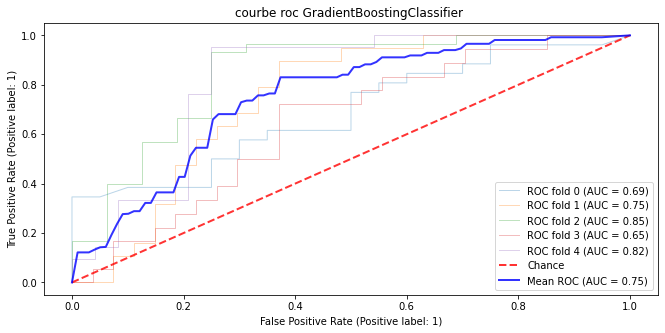

Accuracy: [0.60869565 0.7173913  0.82608696 0.66666667 0.75555556]
moy_accuracy: 0.71
precision_positive: [0.72222222 0.625      0.86666667 0.56521739 0.75      ]
moy_precision_positive: 0.71
sensibilité : [0.5        0.78947368 0.86666667 0.72222222 0.71428571]
moy_sensibilité: 0.72
spécificité : [0.75       0.66666667 0.75       0.62962963 0.79166667]
moy_spécificité: 0.72
MCC : [0.25393725 0.4496144  0.61666667 0.34482815 0.50797216]
MCC: 0.43
balanced_accuracy : [0.625      0.72807018 0.80833333 0.67592593 0.75297619]
balanced_accuracy: 0.72
roc_auc : [0.68846154 0.74853801 0.84583333 0.64609053 0.81944444]
roc_auc: 0.75
cohen_kappa_scorec : [0.23897059 0.43902439 0.61666667 0.33628319 0.50746269]
cohen_kappa_scorec: 0.43
VN : [15 18 12 17 19]
VP : [13 15 26 13 15]
FP : [ 5  9  4 10  5]
FN : [13  4  4  5  6]
precision_négative: [0.53571429 0.81818182 0.75       0.77272727 0.76      ]
moy_precision_négative: 0.73


In [12]:
classifiers = {
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1)
}

def tp(y_true, y_pred): 
    value= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return value

my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
my_scorer1 = make_scorer(tp1, greater_is_better=True)

def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)
def VN(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[0,0]
    return value
my_scorer3 = make_scorer(VN, greater_is_better=True)
def VP(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[1,1]
    return value
my_scorer4 = make_scorer(VP, greater_is_better=True)
def FP(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[0,1]
    return value
my_scorer5 = make_scorer(FP, greater_is_better=True)
def FN(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[1,0]
    return value
my_scorer6 = make_scorer(FN, greater_is_better=True)
def precision_négative(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[1,0])
    return value
my_scorer7 = make_scorer(precision_négative, greater_is_better=True) 
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe, Y)):
         clf.fit( x_rfe.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    scores8 = cross_val_score(clf, x_rfe, Y, scoring=my_scorer3, cv=cv, n_jobs=-1)
    scores9 = cross_val_score(clf, x_rfe, Y, scoring=my_scorer4, cv=cv, n_jobs=-1)
    scores10 = cross_val_score(clf, x_rfe, Y, scoring=my_scorer5, cv=cv, n_jobs=-1)
    scores11= cross_val_score(clf, x_rfe, Y, scoring=my_scorer6, cv=cv, n_jobs=-1)
    scores12= cross_val_score(clf, x_rfe, Y, scoring=my_scorer7, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision_positive:',scores1)
    print('moy_precision_positive: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))
    print('VN :',scores8)
    print('VP :',scores9)
    print('FP :',scores10)
    print('FN :',scores11)
    print('precision_négative:',scores12)
    print('moy_precision_négative: %.2f' % mean(scores12))

In [13]:
classifiers = {
  "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1)}

cv = KFold(n_splits=5, random_state=1, shuffle=True)
lstf=[]
for name, clf in classifiers.items():
    print(name)
    for i, (train, test) in enumerate(cv.split(x_rfe, Y)):
         model=clf.fit(x_rfe.loc[train,], Y.loc[train,])
         importance = model.feature_importances_
         lst=[]
         for j,v in enumerate(importance):
              print('Feature: %s, Score: %f' % (feature_selected[j],v))
              lst.append(v)
              lstf.append([i,feature_selected[j],v])
         print(lst)
         
# evaluate model
    scores = cross_val_score(clf,  x_rfe, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    scores8 = cross_val_score(clf, x_rfe, Y, scoring=my_scorer3, cv=cv, n_jobs=-1)
    scores9 = cross_val_score(clf, x_rfe, Y, scoring=my_scorer4, cv=cv, n_jobs=-1)
    scores10 = cross_val_score(clf, x_rfe, Y, scoring=my_scorer5, cv=cv, n_jobs=-1)
    scores11= cross_val_score(clf, x_rfe, Y, scoring=my_scorer6, cv=cv, n_jobs=-1)
    scores12= cross_val_score(clf, x_rfe, Y, scoring=my_scorer7, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision_positive:',scores1)
    print('moy_precision_positive: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))
    print('VN :',scores8)
    print('VP :',scores9)
    print('FP :',scores10)
    print('FN :',scores11)
    print('precision_négative:',scores12)
    print('moy_precision_négative: %.2f' % mean(scores12))

GradientBoostingClassifier
Feature: Arbrisseau, Score: 0.075493
Feature: Amp2_IRM, Score: 0.019621
Feature: VarT_Cy_IRM, Score: 0.029626
Feature: Amp2_TempJ, Score: 0.062477
Feature: Amp2_TempN, Score: 0.051079
Feature: Amp3_TempN, Score: 0.036492
Feature: VarT_cy_TempN, Score: 0.026475
Feature: Ph1_TempN, Score: 0.039249
Feature: Moy_NDVI, Score: 0.066263
Feature: Ph1_NDVI, Score: 0.074278
Feature: Moy_EVI, Score: 0.044829
Feature: Ph2_EVI, Score: 0.007886
Feature: Rugosite_Min, Score: 0.048474
Feature: Bio_Tj_Moy, Score: 0.060044
Feature: Bio_Thum_Moy, Score: 0.069514
Feature: Bio_Pre_Saison, Score: 0.051097
Feature: Prec_Mars, Score: 0.039544
Feature: Prec_Nov, Score: 0.078851
Feature: Rad_Juin, Score: 0.049912
Feature: Rad_Juill, Score: 0.068796
[0.07549280579822097, 0.019621382368475278, 0.029626214534727198, 0.062476945056548515, 0.051078977038573066, 0.03649157764654081, 0.026474876043721503, 0.03924915391227281, 0.06626342967286108, 0.07427764662580041, 0.04482932260962073, 0.0

In [14]:
lstf

[[0, 'Arbrisseau', 0.07549280579822097],
 [0, 'Amp2_IRM', 0.019621382368475278],
 [0, 'VarT_Cy_IRM', 0.029626214534727198],
 [0, 'Amp2_TempJ', 0.062476945056548515],
 [0, 'Amp2_TempN', 0.051078977038573066],
 [0, 'Amp3_TempN', 0.03649157764654081],
 [0, 'VarT_cy_TempN', 0.026474876043721503],
 [0, 'Ph1_TempN', 0.03924915391227281],
 [0, 'Moy_NDVI', 0.06626342967286108],
 [0, 'Ph1_NDVI', 0.07427764662580041],
 [0, 'Moy_EVI', 0.04482932260962073],
 [0, 'Ph2_EVI', 0.007885747029890436],
 [0, 'Rugosite_Min', 0.04847351201389292],
 [0, 'Bio_Tj_Moy', 0.06004424053141882],
 [0, 'Bio_Thum_Moy', 0.06951444535264419],
 [0, 'Bio_Pre_Saison', 0.051096861287551185],
 [0, 'Prec_Mars', 0.03954358123302359],
 [0, 'Prec_Nov', 0.07885121653551917],
 [0, 'Rad_Juin', 0.049911903211062536],
 [0, 'Rad_Juill', 0.06879616149763473],
 [1, 'Arbrisseau', 0.045683169551602655],
 [1, 'Amp2_IRM', 0.012866955258103678],
 [1, 'VarT_Cy_IRM', 0.016881218048904915],
 [1, 'Amp2_TempJ', 0.058384800115312864],
 [1, 'Amp2_T

In [16]:
df = pd.DataFrame(lstf, columns = ["fold",'variable','importance'])
print(df)

    fold        variable  importance
0      0      Arbrisseau    0.075493
1      0        Amp2_IRM    0.019621
2      0     VarT_Cy_IRM    0.029626
3      0      Amp2_TempJ    0.062477
4      0      Amp2_TempN    0.051079
..   ...             ...         ...
95     4  Bio_Pre_Saison    0.038235
96     4       Prec_Mars    0.040906
97     4        Prec_Nov    0.065340
98     4        Rad_Juin    0.067188
99     4       Rad_Juill    0.083184

[100 rows x 3 columns]


In [17]:
df.to_excel("importance_cx_theileri.xlsx")